### Pandas是python里分析结构化数据的工具集（数据挖掘，结构化数据分析）
#基础是numpy：高性能的矩阵运算
#图形库matplotlib：提供数据可视化
#例子：1。学生成绩分析 2。股票数据分析

使用python进行数据分析
ipython介绍
pandas快速入门
pandas核心数据结构和基础运算
DataFrame（表格）,Series（表格里面的列）
pandas高级内容：
索引和数据选择
分组统计
时间序列
数据IO（从磁盘提出来保存到磁盘）
数据可视化：
实例：
股票数据分析
时间时间日志
'''

In [1]:
import numpy as np
import pandas as pd
#创建一个Series通过传递值的列表，让pandas创建一个默认的整数索引
d = pd.Series([1,3,5,np.nan,6,8])
d

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [2]:
#DataFrame（二维数组）通过传递带有日期时间索引和带标签的列的NumPy数组来创建一个：
dates = pd.date_range('20200308',periods=6)#periods=6是创建6个日期
dates

DatetimeIndex(['2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13'],
              dtype='datetime64[ns]', freq='D')

In [3]:
#创建二维数组
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589
2020-03-09,1.982637,-0.129676,0.220974,-0.012644
2020-03-10,-1.063728,1.462142,0.951604,-0.823527
2020-03-11,-0.909121,0.597954,0.382439,-0.090677
2020-03-12,-0.549542,1.866185,-0.576106,1.784063
2020-03-13,-2.089466,0.790230,-0.479415,0.899206


## DataFrame通过传递对象的字典来创建，这些对象可以转换为类似序列的对象。

In [4]:
df2 = pd.DataFrame({'A':1.,
                    'B':pd.Timestamp('20200308'),
                    'C':pd.Series(1,index=list(range(4)),dtype='float64'),
                    'D':np.array([3]*4,dtype='int64'),
                    'E':pd.Categorical(["test","train","test","train"]),
                    'F':'foo'
    
})
df2

,A,B,C,D,E,F
0,1.0,2020-03-08,1.0,3,test,foo
1,1.0,2020-03-08,1.0,3,train,foo
2,1.0,2020-03-08,1.0,3,test,foo
3,1.0,2020-03-08,1.0,3,train,foo


## 结果的列DataFrame具有不同的dtype

In [5]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float64
D             int64
E          category
F            object
dtype: object

## 查看框架顶部行的方法

In [6]:
df.head()

,A,B,C,D
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589
2020-03-09,1.982637,-0.129676,0.220974,-0.012644
2020-03-10,-1.063728,1.462142,0.951604,-0.823527
2020-03-11,-0.909121,0.597954,0.382439,-0.090677
2020-03-12,-0.549542,1.866185,-0.576106,1.784063


## 查看框架底部行的方法

In [7]:
df.tail(3)

,A,B,C,D
2020-03-11,-0.909121,0.597954,0.382439,-0.090677
2020-03-12,-0.549542,1.866185,-0.576106,1.784063
2020-03-13,-2.089466,0.790230,-0.479415,0.899206


## 显示索引的列

In [8]:
df

,A,B,C,D
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589
2020-03-09,1.982637,-0.129676,0.220974,-0.012644
2020-03-10,-1.063728,1.462142,0.951604,-0.823527
2020-03-11,-0.909121,0.597954,0.382439,-0.090677
2020-03-12,-0.549542,1.866185,-0.576106,1.784063
2020-03-13,-2.089466,0.790230,-0.479415,0.899206


In [9]:
df.index

DatetimeIndex(['2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

### DataFrame.to_numpy()给出基础数据的NumPy表示形式。请注意，当您的DataFrame列具有不同的数据类型时，这可能是一项昂贵的操作，这归结为pandas和NumPy之间的根本区别：NumPy数组在整个数组中具有一个dtype，而pandas DataFrames每列具有一个dtype。当你打算 DataFrame.to_numpy()，pandas会发现NumPy的D型，可容纳所有 的dtypes的数据帧。可能最终是object，这需要将每个值都转换为Python对象。
### 对于df，我们DataFrame所有的浮点值都 DataFrame.to_numpy()非常快，不需要复制数据。

In [11]:
df

,A,B,C,D
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589
2020-03-09,1.982637,-0.129676,0.220974,-0.012644
2020-03-10,-1.063728,1.462142,0.951604,-0.823527
2020-03-11,-0.909121,0.597954,0.382439,-0.090677
2020-03-12,-0.549542,1.866185,-0.576106,1.784063
2020-03-13,-2.089466,0.790230,-0.479415,0.899206


In [12]:
df.to_numpy()

array([[-0.98483599, -0.59441176, -0.39834933, -1.3285886 ],
       [ 1.98263659, -0.12967569,  0.22097369, -0.01264367],
       [-1.06372755,  1.46214165,  0.9516037 , -0.82352737],
       [-0.90912127,  0.59795367,  0.38243858, -0.09067689],
       [-0.54954189,  1.86618488, -0.57610566,  1.7840628 ],
       [-2.08946647,  0.79023029, -0.4794152 ,  0.89920606]])

### 对于df2中，DataFrame有多个dtypes， DataFrame.to_numpy()相对昂贵
### 注意:
### DataFrame.to_numpy()在输出中不包括索引或列标签。

In [13]:
df2

,A,B,C,D,E,F
0,1.0,2020-03-08,1.0,3,test,foo
1,1.0,2020-03-08,1.0,3,train,foo
2,1.0,2020-03-08,1.0,3,test,foo
3,1.0,2020-03-08,1.0,3,train,foo


In [14]:
df2.to_numpy()

array([[1.0, Timestamp('2020-03-08 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2020-03-08 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2020-03-08 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2020-03-08 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

## describe() 显示数据的快速统计摘要：

In [15]:
df

,A,B,C,D
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589
2020-03-09,1.982637,-0.129676,0.220974,-0.012644
2020-03-10,-1.063728,1.462142,0.951604,-0.823527
2020-03-11,-0.909121,0.597954,0.382439,-0.090677
2020-03-12,-0.549542,1.866185,-0.576106,1.784063
2020-03-13,-2.089466,0.790230,-0.479415,0.899206


In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.602343,0.665404,0.016858,0.071305
std,1.367460,0.929095,0.603217,1.132490
min,-2.089466,-0.594412,-0.576106,-1.328589
25%,-1.044005,0.052232,-0.459149,-0.640315
50%,-0.946979,0.694092,-0.088688,-0.051660
75%,-0.639437,1.294164,0.342072,0.671244
max,1.982637,1.866185,0.951604,1.784063


## 转秩数据：

In [17]:
df.T

,2020-03-08 00:00:00,2020-03-09 00:00:00,2020-03-10 00:00:00,2020-03-11 00:00:00,2020-03-12 00:00:00,2020-03-13 00:00:00
A,-0.984836,1.982637,-1.063728,-0.909121,-0.549542,-2.089466
B,-0.594412,-0.129676,1.462142,0.597954,1.866185,0.790230
C,-0.398349,0.220974,0.951604,0.382439,-0.576106,-0.479415
D,-1.328589,-0.012644,-0.823527,-0.090677,1.784063,0.899206


## 按轴排序：

In [18]:
df

,A,B,C,D
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589
2020-03-09,1.982637,-0.129676,0.220974,-0.012644
2020-03-10,-1.063728,1.462142,0.951604,-0.823527
2020-03-11,-0.909121,0.597954,0.382439,-0.090677
2020-03-12,-0.549542,1.866185,-0.576106,1.784063
2020-03-13,-2.089466,0.790230,-0.479415,0.899206


In [19]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2020-03-08,-1.328589,-0.398349,-0.594412,-0.984836
2020-03-09,-0.012644,0.220974,-0.129676,1.982637
2020-03-10,-0.823527,0.951604,1.462142,-1.063728
2020-03-11,-0.090677,0.382439,0.597954,-0.909121
2020-03-12,1.784063,-0.576106,1.866185,-0.549542
2020-03-13,0.899206,-0.479415,0.790230,-2.089466


## 按值排序：

In [20]:
df.sort_values(by='B')

,A,B,C,D
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589
2020-03-09,1.982637,-0.129676,0.220974,-0.012644
2020-03-11,-0.909121,0.597954,0.382439,-0.090677
2020-03-13,-2.089466,0.790230,-0.479415,0.899206
2020-03-10,-1.063728,1.462142,0.951604,-0.823527
2020-03-12,-0.549542,1.866185,-0.576106,1.784063


## 选择
选择一个单列，产生一个Series，等于df.A

In [21]:
df

,A,B,C,D
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589
2020-03-09,1.982637,-0.129676,0.220974,-0.012644
2020-03-10,-1.063728,1.462142,0.951604,-0.823527
2020-03-11,-0.909121,0.597954,0.382439,-0.090677
2020-03-12,-0.549542,1.866185,-0.576106,1.784063
2020-03-13,-2.089466,0.790230,-0.479415,0.899206


In [22]:
df['A']

2020-03-08   -0.984836
2020-03-09    1.982637
2020-03-10   -1.063728
2020-03-11   -0.909121
2020-03-12   -0.549542
2020-03-13   -2.089466
Freq: D, Name: A, dtype: float64

## 切片

In [23]:
df[0:3]

,A,B,C,D
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589
2020-03-09,1.982637,-0.129676,0.220974,-0.012644
2020-03-10,-1.063728,1.462142,0.951604,-0.823527


In [24]:
df['20200308':'20200310']

,A,B,C,D
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589
2020-03-09,1.982637,-0.129676,0.220974,-0.012644
2020-03-10,-1.063728,1.462142,0.951604,-0.823527


## 通过标签labels选择

In [25]:
df

,A,B,C,D
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589
2020-03-09,1.982637,-0.129676,0.220974,-0.012644
2020-03-10,-1.063728,1.462142,0.951604,-0.823527
2020-03-11,-0.909121,0.597954,0.382439,-0.090677
2020-03-12,-0.549542,1.866185,-0.576106,1.784063
2020-03-13,-2.089466,0.790230,-0.479415,0.899206


## 要使用标签获取横截面：

In [26]:
df.loc[dates[0]]

A   -0.984836
B   -0.594412
C   -0.398349
D   -1.328589
Name: 2020-03-08 00:00:00, dtype: float64

## 通过标签在多轴上选择：

In [27]:
df.loc[:,['A','B']]

,A,B
2020-03-08,-0.984836,-0.594412
2020-03-09,1.982637,-0.129676
2020-03-10,-1.063728,1.462142
2020-03-11,-0.909121,0.597954
2020-03-12,-0.549542,1.866185
2020-03-13,-2.089466,0.790230


## 显示标签切片，两个端点都包括在内：

In [28]:
df.loc['20200308':'20200310',['A','B']]

,A,B
2020-03-08,-0.984836,-0.594412
2020-03-09,1.982637,-0.129676
2020-03-10,-1.063728,1.462142


## 降低返回对象的数据维度：

In [29]:
df.loc['20200308',['A','B']]

A   -0.984836
B   -0.594412
Name: 2020-03-08 00:00:00, dtype: float64

## 获得实际数据值：

In [30]:
df.loc[dates[0],'A']

-0.9848359898444133

## 快速访问实际数据值（相当于先前的方法）：


In [31]:
df.at[dates[0],'A']

-0.9848359898444133

# 通过位置选择数据:
## 1.通过传递的整数的参数位置进行选择

In [32]:
df

,A,B,C,D
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589
2020-03-09,1.982637,-0.129676,0.220974,-0.012644
2020-03-10,-1.063728,1.462142,0.951604,-0.823527
2020-03-11,-0.909121,0.597954,0.382439,-0.090677
2020-03-12,-0.549542,1.866185,-0.576106,1.784063
2020-03-13,-2.089466,0.790230,-0.479415,0.899206


In [33]:
df.iloc[3]

A   -0.909121
B    0.597954
C    0.382439
D   -0.090677
Name: 2020-03-11 00:00:00, dtype: float64

## 2.通过整数切片(左闭右开)，其行为类似于numpy / python：



In [34]:
df.iloc[3:5,0:2]

,A,B
2020-03-11,-0.909121,0.597954
2020-03-12,-0.549542,1.866185


## 3.通过整数位置位置列表(左闭右开)，类似于numpy / python样式：

In [35]:
df.iloc[[1,2,4],[0,2]]

,A,C
2020-03-09,1.982637,0.220974
2020-03-10,-1.063728,0.951604
2020-03-12,-0.549542,-0.576106


## 4.指定行切片：

In [36]:
df.iloc[1:3,:]

,A,B,C,D
2020-03-09,1.982637,-0.129676,0.220974,-0.012644
2020-03-10,-1.063728,1.462142,0.951604,-0.823527


## 5.指定列切片：

In [37]:
df.iloc[:,1:3]

,B,C
2020-03-08,-0.594412,-0.398349
2020-03-09,-0.129676,0.220974
2020-03-10,1.462142,0.951604
2020-03-11,0.597954,0.382439
2020-03-12,1.866185,-0.576106
2020-03-13,0.790230,-0.479415


## 6.获取指定的数据值

In [38]:
df

,A,B,C,D
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589
2020-03-09,1.982637,-0.129676,0.220974,-0.012644
2020-03-10,-1.063728,1.462142,0.951604,-0.823527
2020-03-11,-0.909121,0.597954,0.382439,-0.090677
2020-03-12,-0.549542,1.866185,-0.576106,1.784063
2020-03-13,-2.089466,0.790230,-0.479415,0.899206


In [39]:
df.iloc[1,1]

-0.1296756884612097

## 快速获取指定的数据值（相当于之前的方法）

In [40]:
df.iat[1,1]

-0.1296756884612097

# 布尔索引
## 1.使用某一列来选取数据值

In [41]:
df[df['A']>0]

,A,B,C,D
2020-03-09,1.982637,-0.129676,0.220974,-0.012644


## 2.从满足布尔条件的DataFrame中选择值

In [42]:
df[df>0]

,A,B,C,D
2020-03-08,NaN,NaN,NaN,NaN
2020-03-09,1.982637,NaN,0.220974,NaN
2020-03-10,NaN,1.462142,0.951604,NaN
2020-03-11,NaN,0.597954,0.382439,NaN
2020-03-12,NaN,1.866185,NaN,1.784063
2020-03-13,NaN,0.790230,NaN,0.899206


## 3.使用isin（）方法来过滤数据

In [43]:
df2=df.copy()
df2['E']=['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589,one
2020-03-09,1.982637,-0.129676,0.220974,-0.012644,one
2020-03-10,-1.063728,1.462142,0.951604,-0.823527,two
2020-03-11,-0.909121,0.597954,0.382439,-0.090677,three
2020-03-12,-0.549542,1.866185,-0.576106,1.784063,four
2020-03-13,-2.089466,0.790230,-0.479415,0.899206,three


# 赋值
## 1.当我们赋值一列新的数据的时候，将会自动根据索引进行数据匹配

In [44]:
s1 =pd.Series([1,2,3,4,5,6],index=pd.date_range('20200308',periods=6))
df['F']=s1
df

,A,B,C,D,F
2020-03-08,-0.984836,-0.594412,-0.398349,-1.328589,1
2020-03-09,1.982637,-0.129676,0.220974,-0.012644,2
2020-03-10,-1.063728,1.462142,0.951604,-0.823527,3
2020-03-11,-0.909121,0.597954,0.382439,-0.090677,4
2020-03-12,-0.549542,1.866185,-0.576106,1.784063,5
2020-03-13,-2.089466,0.790230,-0.479415,0.899206,6


## 2.通过标签设置值：

In [45]:
df.at[dates[0],'A']=0


## 3.按位置设置值

In [46]:
df.iat[0,1]=0
df

,A,B,C,D,F
2020-03-08,0.000000,0.000000,-0.398349,-1.328589,1
2020-03-09,1.982637,-0.129676,0.220974,-0.012644,2
2020-03-10,-1.063728,1.462142,0.951604,-0.823527,3
2020-03-11,-0.909121,0.597954,0.382439,-0.090677,4
2020-03-12,-0.549542,1.866185,-0.576106,1.784063,5
2020-03-13,-2.089466,0.790230,-0.479415,0.899206,6


## 4.通过numpy数字进行赋值

In [47]:
df.loc[:,'D']=np.array([5]*len(df))

In [48]:
df

,A,B,C,D,F
2020-03-08,0.000000,0.000000,-0.398349,5,1
2020-03-09,1.982637,-0.129676,0.220974,5,2
2020-03-10,-1.063728,1.462142,0.951604,5,3
2020-03-11,-0.909121,0.597954,0.382439,5,4
2020-03-12,-0.549542,1.866185,-0.576106,5,5
2020-03-13,-2.089466,0.790230,-0.479415,5,6


## 5.where操作赋值

In [49]:
df2=df.copy()
df2[df2>0]=-df2
df2

,A,B,C,D,F
2020-03-08,0.000000,0.000000,-0.398349,-5,-1
2020-03-09,-1.982637,-0.129676,-0.220974,-5,-2
2020-03-10,-1.063728,-1.462142,-0.951604,-5,-3
2020-03-11,-0.909121,-0.597954,-0.382439,-5,-4
2020-03-12,-0.549542,-1.866185,-0.576106,-5,-5
2020-03-13,-2.089466,-0.790230,-0.479415,-5,-6


# 丢失数据（missing Data）
pandas 主要采用 np.nan 表示缺失数据。 在计算过程中，默认不会涵盖这类值。

重建索引操作可以修改、添加、删除指定轴向上的索引，并会返回数据的副本。

In [54]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E']=1
df1

,A,B,C,D,F,E
2020-03-08,0.000000,0.000000,-0.398349,5,1,1.0
2020-03-09,1.982637,-0.129676,0.220974,5,2,1.0
2020-03-10,-1.063728,1.462142,0.951604,5,3,NaN
2020-03-11,-0.909121,0.597954,0.382439,5,4,NaN


### 2.删除任何缺少数据的行

In [55]:
df1.dropna(how='any')

,A,B,C,D,F,E
2020-03-08,0.000000,0.000000,-0.398349,5,1,1.0
2020-03-09,1.982637,-0.129676,0.220974,5,2,1.0


### 3.填充丢失的数据。

In [56]:
df1.fillna(value=5)

,A,B,C,D,F,E
2020-03-08,0.000000,0.000000,-0.398349,5,1,1.0
2020-03-09,1.982637,-0.129676,0.220974,5,2,1.0
2020-03-10,-1.063728,1.462142,0.951604,5,3,5.0
2020-03-11,-0.909121,0.597954,0.382439,5,4,5.0


### 4.获取值所在的布尔掩码nan。

In [57]:
pd.isna(df1)

,A,B,C,D,F,E
2020-03-08,False,False,False,False,False,False
2020-03-09,False,False,False,False,False,False
2020-03-10,False,False,False,False,False,True
2020-03-11,False,False,False,False,False,True


# 运算
请参阅二元运算的基础知识。

统计运算
运算通常都不涉及缺失数据。

以下将执行描述性统计（descriptive statistic）：



In [58]:
df.mean()

A   -0.438203
B    0.764472
C    0.016858
D    5.000000
F    3.500000
dtype: float64

### 2.另一轴上的相同操作：

In [59]:
df.mean(1)

2020-03-08    1.120330
2020-03-09    1.814787
2020-03-10    1.870004
2020-03-11    1.814254
2020-03-12    2.148107
2020-03-13    1.844270
Freq: D, dtype: float64

### 3.以下将对多个对象进行运算，他们维数不同且需要做数据匹配。并且 pandas 还会自动沿着指定维度将运算传递下去（broadcast）

In [60]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
s

2020-03-08    NaN
2020-03-09    NaN
2020-03-10    1.0
2020-03-11    3.0
2020-03-12    5.0
2020-03-13    NaN
Freq: D, dtype: float64

In [61]:
df.sub(s,axis='index')

,A,B,C,D,F
2020-03-08,NaN,NaN,NaN,NaN,NaN
2020-03-09,NaN,NaN,NaN,NaN,NaN
2020-03-10,-2.063728,0.462142,-0.048396,4.0,2.0
2020-03-11,-3.909121,-2.402046,-2.617561,2.0,1.0
2020-03-12,-5.549542,-3.133815,-5.576106,0.0,0.0
2020-03-13,NaN,NaN,NaN,NaN,NaN


# Apply
以下将对数据应用多个函数：

In [62]:
df.apply(np.cumsum)

,A,B,C,D,F
2020-03-08,0.000000,0.000000,-0.398349,5,1
2020-03-09,1.982637,-0.129676,-0.177376,10,3
2020-03-10,0.918909,1.332466,0.774228,15,6
2020-03-11,0.009788,1.930420,1.156667,20,10
2020-03-12,-0.539754,3.796605,0.580561,25,15
2020-03-13,-2.629221,4.586835,0.101146,30,21


In [64]:
df.apply(lambda x:x.max()-x.min())

A    4.072103
B    1.995861
C    1.527709
D    0.000000
F    5.000000
dtype: float64

# 值的分布情况

In [65]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    4
1    0
2    6
3    4
4    5
5    4
6    3
7    1
8    4
9    4
dtype: int64

In [66]:
s.value_counts()

4    5
6    1
5    1
3    1
1    1
0    1
dtype: int64

# 字符串的方法
Series在str 属性中配备了一组字符串处理方法，这些方法使您可以轻松地对数组的每个元素进行操作，如下面的代码片段所示。请注意，str中的模式匹配通常默认情况下使用正则表达式（在某些情况下始终使用正则表达式）。在矢量化字符串方法中查看更多内容。

In [67]:
s = pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 合并
CONCAT 
在连接/合并类型操作的情况下，pandas提供了各种功能，可以轻松地将Series和DataFrame对象与各种用于索引和关系代数功能的集合逻辑组合在一起。

请参阅合并部分。

将pandas对象与串联在一起concat()：

In [68]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,1.497966,0.566726,1.077188,1.235011
1,-1.159371,0.037695,1.192715,0.616029
2,-0.861977,-2.427593,-0.466839,0.987326
3,1.525145,-2.073724,-0.283944,0.609868
4,1.343849,0.311324,0.730158,-0.358968
5,-1.591424,0.787860,-1.461693,-0.094357
6,0.226308,1.144383,0.509003,0.654292
7,0.526303,-0.636545,-0.618248,-0.218000
8,1.561327,0.590044,0.436104,0.329147
9,0.995047,0.769179,0.730412,0.911851


In [70]:
pieces = [df[:3],df[3:7],df[7:]]
pd.concat(pieces)

,0,1,2,3
0,1.497966,0.566726,1.077188,1.235011
1,-1.159371,0.037695,1.192715,0.616029
2,-0.861977,-2.427593,-0.466839,0.987326
3,1.525145,-2.073724,-0.283944,0.609868
4,1.343849,0.311324,0.730158,-0.358968
5,-1.591424,0.787860,-1.461693,-0.094357
6,0.226308,1.144383,0.509003,0.654292
7,0.526303,-0.636545,-0.618248,-0.218000
8,1.561327,0.590044,0.436104,0.329147
9,0.995047,0.769179,0.730412,0.911851


## 注意

将列添加到DataFrame中相对较快。但是，添加一行需要一个副本，并且可能很昂贵。我们建议将预先构建的记录列表传递给DataFrame构造函数，而不是DataFrame通过将记录迭代地附加到构造函数来构建。有关更多信息，请参见附加到数据框。

# 连接（join）
这是 SQL 风格的合并。请参阅数据库风格的连接操作。

In [71]:
left = pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
left

,key,lval
0,foo,1
1,foo,2


In [72]:
right

,key,rval
0,foo,4
1,foo,5


In [75]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## 可以给出的另一个示例是：

In [76]:
left = pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})
left

,key,lval
0,foo,1
1,bar,2


In [77]:
right

,key,rval
0,foo,4
1,bar,5


In [78]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# 分组
“分组依据”是指涉及以下一个或多个步骤的过程：

拆分数据到基于某些标准组

将功能独立应用于每个组

将结果合并为数据结构

请参阅分组部分。

In [79]:
df = pd.DataFrame({'A':['foo','bar','foo','bar',
                       'foo','bar','foo','foo'],
                  'B':['one','one','two','three',
                      'two','two','one','three'],
                  'C':np.random.randn(8),
                  'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.212423,0.483682
1,bar,one,-0.542735,0.671359
2,foo,two,-0.616689,0.011992
3,bar,three,0.311850,-0.658157
4,foo,two,-0.450534,0.076166
5,bar,two,-0.427859,0.116604
6,foo,one,-0.606345,-1.563190
7,foo,three,1.233236,2.828212


## 分组，然后将sum()功能应用于结果组。

In [80]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.658745,0.129806
foo,-1.652756,1.836862


## 通过多列分组形成一个层次结构索引，我们可以再次应用该sum功能。

In [81]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.542735  0.671359
    three  0.311850 -0.658157
    two   -0.427859  0.116604
foo one   -1.818768 -1.079508
    three  1.233236  2.828212
    two   -1.067224  0.088157

# 重塑
请参阅“ 分层索引编制和 重塑”部分。

压缩（堆栈stack）

In [83]:
tuples = list(zip(*[['bar','bar','baz','baz',
                    'foo','foo','qux','qux'],
                   ['one','two','one','two',
                   'one','two','one','two']]))
index = pd.MultiIndex.from_tuples(tuples,names=['first','second'])
df = pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df2 = df[:4]
df2


A         B
first second                    
bar   one    -1.187556 -0.613346
      two    -0.417767  0.985725
baz   one    -1.314116  1.503936
      two    -0.313109 -1.109171

## stack() 方法会“压缩” DataFrame 数据列的层级。

In [84]:
stacked= df2.stack()
stacked

first  second   
bar    one     A   -1.187556
               B   -0.613346
       two     A   -0.417767
               B    0.985725
baz    one     A   -1.314116
               B    1.503936
       two     A   -0.313109
               B   -1.109171
dtype: float64

## 对于“堆叠的” DataFrame或系列（具有a MultiIndex作为 index），stack()is 的逆运算unstack()默认情况下会取消堆叠最后一级：

In [86]:
stacked.unstack()

A         B
first second                    
bar   one    -1.187556 -0.613346
      two    -0.417767  0.985725
baz   one    -1.314116  1.503936
      two    -0.313109 -1.109171

In [87]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.187556 -0.417767
      B -0.613346  0.985725
baz   A -1.314116 -0.313109
      B  1.503936 -1.109171

In [88]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.187556 -1.314116
       B -0.613346  1.503936
two    A -0.417767 -0.313109
       B  0.985725 -1.109171

# 数据透视表（Pivot Table）

In [89]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df
    

,A,B,C,D,E
0,one,A,foo,-0.206285,0.902588
1,one,B,foo,1.896797,-0.454932
2,two,C,foo,-0.003248,0.094321
3,three,A,bar,0.079494,-0.923545
4,one,B,bar,0.100118,0.982025
5,one,C,bar,1.998982,1.064468
6,two,A,foo,0.359535,0.350358
7,three,B,foo,-0.868499,-0.395306
8,one,C,foo,0.644281,1.668993
9,one,A,bar,1.655336,-0.778528


## 我们可以很容易地从这些数据生成数据透视表：

In [90]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])


C             bar       foo
A     B                    
one   A  1.655336 -0.206285
      B  0.100118  1.896797
      C  1.998982  0.644281
three A  0.079494       NaN
      B       NaN -0.868499
      C  0.274382       NaN
two   A       NaN  0.359535
      B  1.302863       NaN
      C       NaN -0.003248

# 时间序列
pandas具有简单，强大和高效的功能，可以在频率转换过程中执行重采样操作（例如，将第二数据转换为5分钟数据）。这在金融应用程序中非常普遍，但不仅限于此。请参阅“ 时间序列”部分。

In [93]:
rng = pd.date_range('9/3/2020',periods=100,freq='S')
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts.resample('5Min').sum()

2020-09-03    26748
Freq: 5T, dtype: int64

## 时区表示：

In [96]:
rng = pd.date_range('9/3/2020 00:00',periods=5,freq='D')
ts = pd.Series(np.random.randn(len(rng)),rng)
ts

2020-09-03    1.841483
2020-09-04   -0.429318
2020-09-05   -0.923287
2020-09-06    1.204696
2020-09-07   -0.335506
Freq: D, dtype: float64

In [97]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-09-03 00:00:00+00:00    1.841483
2020-09-04 00:00:00+00:00   -0.429318
2020-09-05 00:00:00+00:00   -0.923287
2020-09-06 00:00:00+00:00    1.204696
2020-09-07 00:00:00+00:00   -0.335506
Freq: D, dtype: float64

## 转换到另一个时区：

In [98]:
ts_utc.tz_convert('US/Eastern')

2020-09-02 20:00:00-04:00    1.841483
2020-09-03 20:00:00-04:00   -0.429318
2020-09-04 20:00:00-04:00   -0.923287
2020-09-05 20:00:00-04:00    1.204696
2020-09-06 20:00:00-04:00   -0.335506
Freq: D, dtype: float64

## 在时间跨度表示之间进行转换：

In [100]:
rng = pd.date_range('9/3/2020',periods=5,freq='M')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2020-09-30    0.067212
2020-10-31   -0.613596
2020-11-30    0.337758
2020-12-31    0.312805
2021-01-31   -0.769307
Freq: M, dtype: float64

In [101]:
ps= ts.to_period()
ps

2020-09    0.067212
2020-10   -0.613596
2020-11    0.337758
2020-12    0.312805
2021-01   -0.769307
Freq: M, dtype: float64

In [102]:
ps.to_timestamp()

2020-09-01    0.067212
2020-10-01   -0.613596
2020-11-01    0.337758
2020-12-01    0.312805
2021-01-01   -0.769307
Freq: MS, dtype: float64

## 在周期和时间戳之间转换可以使用一些方便的算术函数。在以下示例中，我们将以11月结束的年度的季度频率转换为季度结束后的月末的上午9点：

In [108]:
prng = pd.period_range('2019Q1','2020Q4',freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)),prng)
ts.index= (prng.asfreq('M','e')+1).asfreq('H','S')+9

ts.head()

2019-03-01 09:00   -0.799846
2019-06-01 09:00    1.526288
2019-09-01 09:00    0.048965
2019-12-01 09:00    0.294019
2020-03-01 09:00    1.671731
Freq: H, dtype: float64

# 类别
pandas可以在中包含分类数据DataFrame。

In [109]:
df =pd.DataFrame({'id':[1,2,3,4,5,6],
                 'raw_grade':['a','b','b','a','a','e']})

## 将原始成绩转换为分类数据类型

In [110]:
df['grade']=df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

## 将类别重命名为更有意义的名称（Series.cat.categories就地分配 ！）。

In [111]:
df['grade'].cat.categories = ['very good','good','very bad']

## 重新排列类别并同时添加缺少的类别（默认情况下，返回新方法下的方法）。Series.catSeries

In [115]:
df['grade'] = df['grade'].cat.set_categories(['very good','bad','medium',
                                             'good','very bad'])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5          NaN
Name: grade, dtype: category
Categories (5, object): [very good, bad, medium, good, very bad]

## 排序是按类别中的顺序进行的，而不是词汇顺序。

In [116]:
df.sort_values(by='grade')

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,NaN


## 按类别列分组还显示空类别。

In [118]:
df.groupby('grade').size()

grade
very good    3
bad          0
medium       0
good         2
very bad     0
dtype: int64

# 绘图
请参阅“ 绘图”文档。

我们使用标准约定来引用matplotlib API：

In [121]:
import matplotlib.pyplot as plt
plt.close('all')

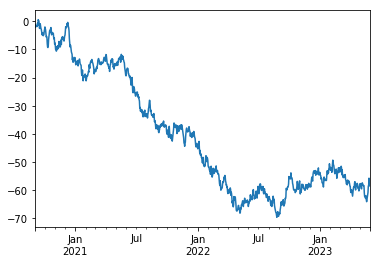

In [123]:
ts = pd.Series(np.random.randn(1000),
              index = pd.date_range(('9/3/2020'),periods=1000))
ts = ts.cumsum()
ts.plot()

## 在DataFrame上，该plot()方法很方便地绘制带有标签的所有列：

<Figure size 432x288 with 0 Axes>

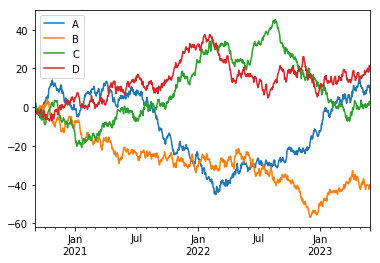

In [124]:
df = pd.DataFrame(np.random.randn(1000,4),index = ts.index,
                 columns =['A','B','C','D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')